# Mag TOV (7 Levels)

In [1]:
using Plots
include("../../Utils/plt_tools.jl")

Main.PltTools

## Scaling

M/day
   RefineZ: [ 4.97e+03, 2.24e+03, 1.04e+03, 4.70e+02, 2.28e+02, 1.07e+02]
   RefineX: [ 4.97e+03, 2.33e+03, 1.02e+03, 4.68e+02, 2.15e+02]
Zcs/sec
   RefineZ: [ 1.67e+08, 3.00e+08, 5.55e+08, 1.00e+09, 1.97e+09, 3.72e+09]
   RefineX: [ 1.67e+08, 3.12e+08, 5.45e+08, 1.02e+09, 1.88e+09]
Efficiency
   RefineZ: [ 1.00e+00, 8.98e-01, 8.33e-01, 7.51e-01, 7.37e-01, 6.96e-01]
   RefineX: [ 1.00e+00, 9.36e-01, 8.17e-01, 7.65e-01, 7.04e-01]
Zcs/sec
   RefineZ: [ 1.35e+08, 2.43e+08, 4.52e+08, 8.18e+08, 1.59e+09, 2.98e+09]
   RefineX: [ 1.35e+08, 2.54e+08, 4.44e+08, 8.14e+08, 1.50e+09]


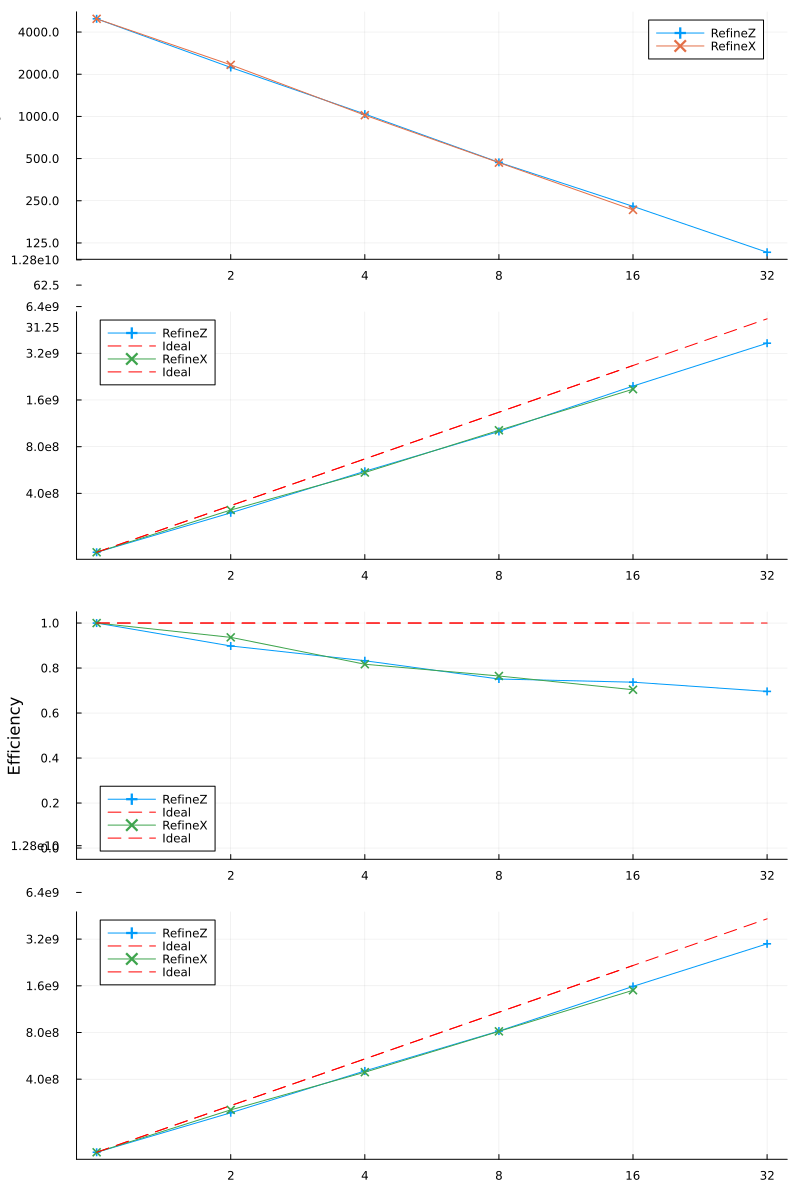

In [7]:
let patt_dirss = [
        ([
            (r"Z4cow_L7_G128-N\d+-MPI\d+_r0000", "RefineZ"),
        ], "../data/magTOV/Levels7/Weak/Block32-From1N", :cross),
        ([
            (r"Z4cow_L7_G128-N\d+-MPI\d+_r0000", "RefineX"),
        ], "../data/magTOV/Levels7/Weak/Block32-From1N-RefineX", :xcross),
    ]

    # Plot M/day
    plt1 = plot(ylabel="M/day", xscale=:log10, yscale=:log10)
    xs = [2, 4, 8, 16, 32, 64, 128, 256]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [31.25, 62.5, 125, 250, 500, 1000, 2000, 4000]
    yticks!(plt1, ys, [string(n) for n in ys])
    println("M/day")
    PltTools.plot_scaling(plt1, patt_dirss; option="TotalComputeTime", is_plot_ideal=false, is_print_value=true)

    # Plot Zcs/sec
    plt2 = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [2, 4, 8, 16, 32, 64, 128, 256]
    xticks!(plt2, xs, [string(n) for n in xs])
    ys = [4e8, 8e8, 1.6e9, 3.2e9, 6.4e9, 1.28e10]
    yticks!(plt2, ys, [string(n) for n in ys])
    println("Zcs/sec")
    PltTools.plot_scaling(plt2, patt_dirss; option="ZcsPerSecond", is_plot_ideal=true, is_print_value=true)
    
    # Plot Efficiency
    plt3 = plot(ylabel="Efficiency", xscale=:log10, ylim=(-0.05,1.05), legend=:bottomleft)
    xs = [2, 4, 8, 16, 32, 64, 128, 256]
    xticks!(plt3, xs, [string(n) for n in xs])
    ys = [0, 0.2, 0.4, 0.6, 0.8, 1]
    yticks!(plt3, ys, [string(n) for n in ys])
    println("Efficiency")
    PltTools.plot_efficiency(plt3, patt_dirss; option="ZcsPerSecond", is_plot_ideal=true, is_print_value=true)
    
    # Plot Zcs/sec2
    plt4 = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [2, 4, 8, 16, 32, 64, 128, 256]
    xticks!(plt4, xs, [string(n) for n in xs])
    ys = [4e8, 8e8, 1.6e9, 3.2e9, 6.4e9, 1.28e10]
    yticks!(plt4, ys, [string(n) for n in ys])
    println("Zcs/sec")
    PltTools.plot_scaling(plt4, patt_dirss; option="ZcsPerSecond2", is_plot_ideal=true, is_print_value=true)

    # Sum
    plt = plot(plt1, plt2, plt3, plt4, layout=(4,1), size = (800, 1200))
    display(plt)
end

## Speed

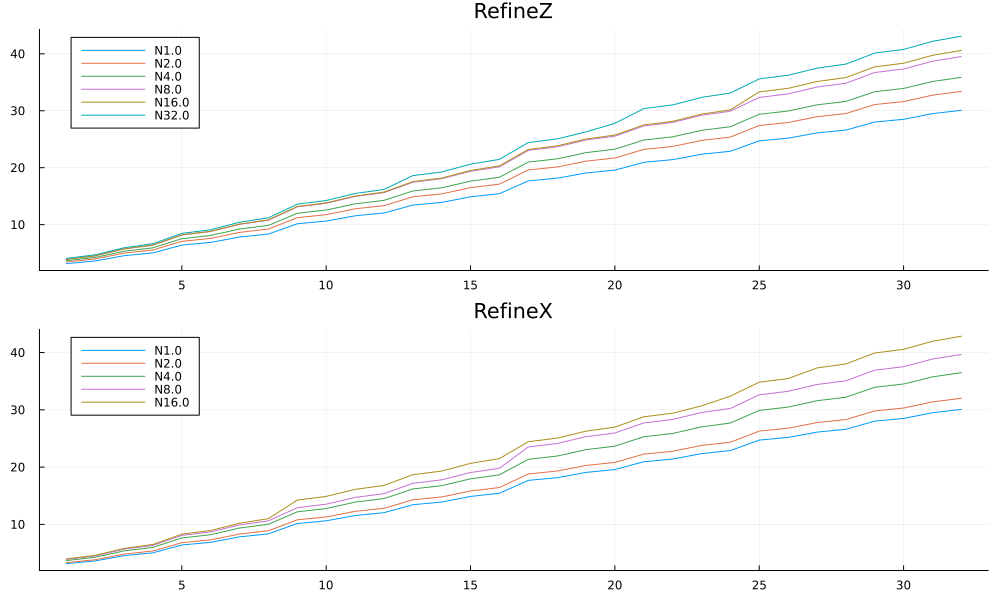

In [11]:
let patt_dirss = [
        ([
            (r"Z4cow_L7_G128-N\d+-MPI\d+_r0000", "RefineZ"),
        ], "../data/magTOV/Levels7/Weak/Block32-From1N", :cross),
        ([
            (r"Z4cow_L7_G128-N\d+-MPI\d+_r0000", "RefineX"),
        ], "../data/magTOV/Levels7/Weak/Block32-From1N-RefineX", :xcross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = PltTools.LoadData.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[4], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(2,1), size=(1000, 600))
    display(plt)
end

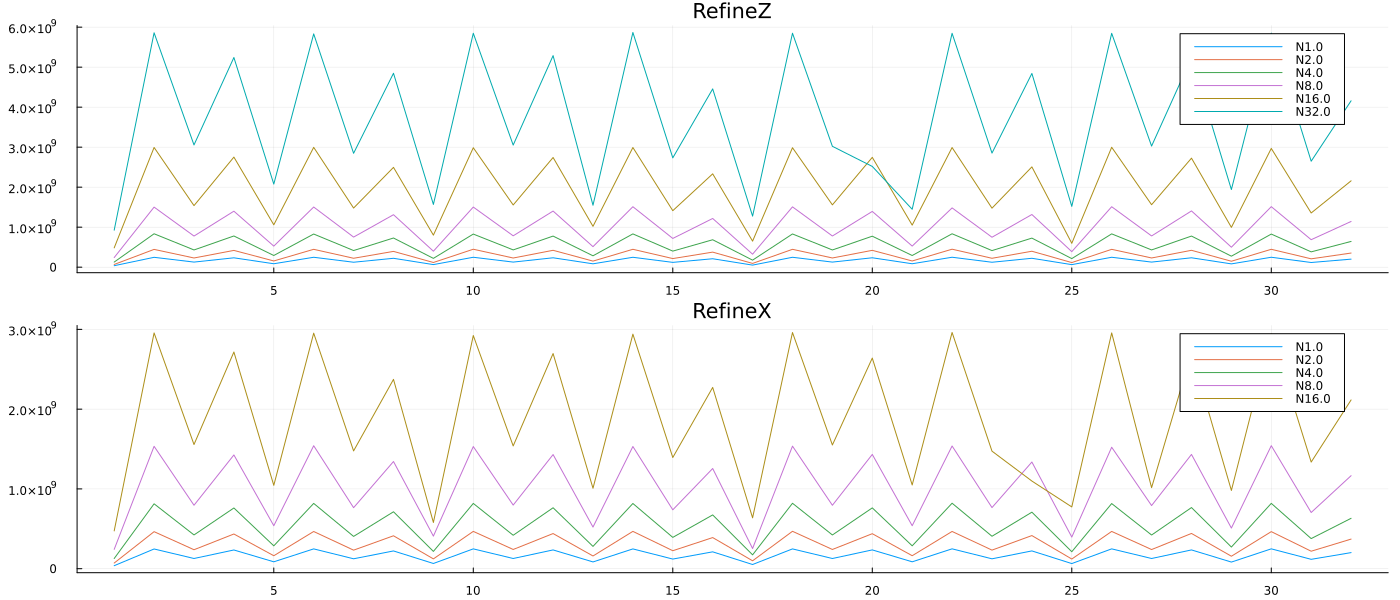

In [13]:
let patt_dirss = [
        ([
            (r"Z4cow_L7_G128-N\d+-MPI\d+_r0000", "RefineZ"),
        ], "../data/magTOV/Levels7/Weak/Block32-From1N", :cross),
        ([
            (r"Z4cow_L7_G128-N\d+-MPI\d+_r0000", "RefineX"),
        ], "../data/magTOV/Levels7/Weak/Block32-From1N-RefineX", :xcross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = PltTools.LoadData.load_values(patterns, parent_dir; option="ZcsPerSecond")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[4], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(2,1), size=(1400, 600))
    display(plt)
end